In [170]:
# import packages
import numpy as np
import pandas as pd

# Load the data
sales = pd.read_csv("supermarket_sales.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [171]:
# Only Keep the underscored variable
# first to get rid of variables that I don’t need by using the drop() function.
sales = sales.drop(columns = ["City","Unit price","Tax 5%","Date","cogs","gross margin percentage"])

In [172]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Time           1000 non-null   object 
 8   Payment        1000 non-null   object 
 9   gross income   1000 non-null   float64
 10  Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [4]:
sales.describe()

,Quantity,Total,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,5.510000,322.966749,15.379369,6.97270
std,2.923431,245.885335,11.708825,1.71858
min,1.000000,10.678500,0.508500,4.00000
25%,3.000000,124.422375,5.924875,5.50000
50%,5.000000,253.848000,12.088000,7.00000
75%,8.000000,471.350250,22.445250,8.50000
max,10.000000,1042.650000,49.650000,10.00000


Attribute information
* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in dollar
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [5]:
# No missing value, but let's see if there is duplicate instance
sales.duplicated().sum()

0

In [6]:
sales.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Quantity,Total,Time,Payment,gross income,Rating
0,750-67-8428,A,Member,Female,Health and beauty,7,548.9715,13:08,Ewallet,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,5,80.2200,10:29,Cash,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,7,340.5255,13:23,Credit card,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,8,489.0480,20:33,Ewallet,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,7,634.3785,10:37,Ewallet,30.2085,5.3


In [ ]:
# questions are the north star of our exploration
# For this dataset, we need to provide insights revolving around branches

# Base on the homework requirement, I specificly interested in 
# Whether the customer type has significant different among these 3 branches

In [7]:
sales.groupby(['Branch','Customer type']).agg('size')

Branch  Customer type
A       Member           167
        Normal           173
B       Member           165
        Normal           167
C       Member           169
        Normal           159
dtype: int64

In [8]:
pd.DataFrame(sales.groupby(['Branch','Customer type']).agg('size')).rename(columns={0:'counts'})

counts
Branch Customer type        
A      Member            167
       Normal            173
B      Member            165
       Normal            167
C      Member            169
       Normal            159

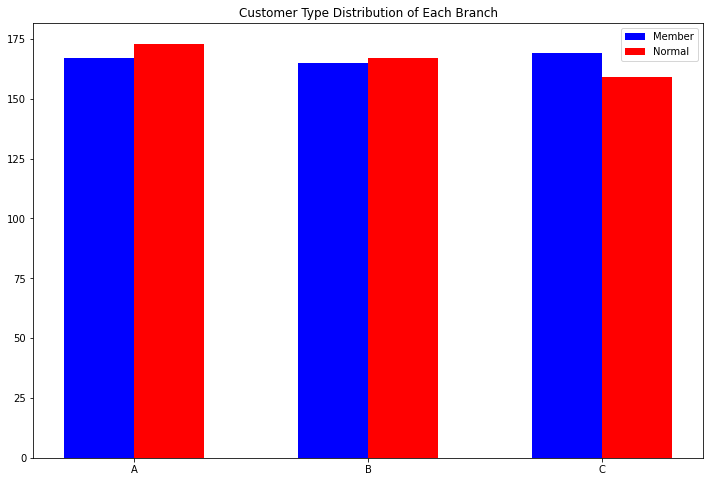

In [32]:
import matplotlib.pyplot as plt

# To Visualize This

y_value1 = sales.groupby(['Branch','Customer type']).agg('size')[[0,2,4]]
y_value2 = sales.groupby(['Branch','Customer type']).agg('size')[[1,3,5]]
Barwidth = 0.3
br1 = np.arange(len(y_value1))
br2 = br1 + Barwidth

plt.figure(figsize = (12,8))
plt.bar(br1,y_value1, color = 'b', width = Barwidth, label = "Member")
plt.bar(br2,y_value2, color = 'r', width = Barwidth, label = "Normal")
plt.title("Customer Type Distribution of Each Branch")
plt.xticks([r + Barwidth/2 for r in range(len(y_value1))],
        ['A', 'B', 'C'])
plt.legend()
plt.show()

In [ ]:
# From the diagram we could easily know that the customer type distributions of of different branches are similar

In [21]:
sales.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Quantity,Total,Time,Payment,gross income,Rating
0,750-67-8428,A,Member,Female,Health and beauty,7,548.9715,13:08,Ewallet,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,5,80.2200,10:29,Cash,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,7,340.5255,13:23,Credit card,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,8,489.0480,20:33,Ewallet,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,7,634.3785,10:37,Ewallet,30.2085,5.3


In [ ]:
# Then, I am also curious about the customer's gender's situation among these 3 branches
# Whether the customer gender's distribution has significant different among these 3 branches

In [22]:
sales.groupby(['Branch','Gender']).agg('size')

Branch  Gender
A       Female    161
        Male      179
B       Female    162
        Male      170
C       Female    178
        Male      150
dtype: int64

In [173]:
pd.DataFrame(sales.groupby(['Branch','Gender']).agg('size')).rename(columns={0:'counts'})

counts
Branch Gender        
A      Female     161
       Male       179
B      Female     162
       Male       170
C      Female     178
       Male       150

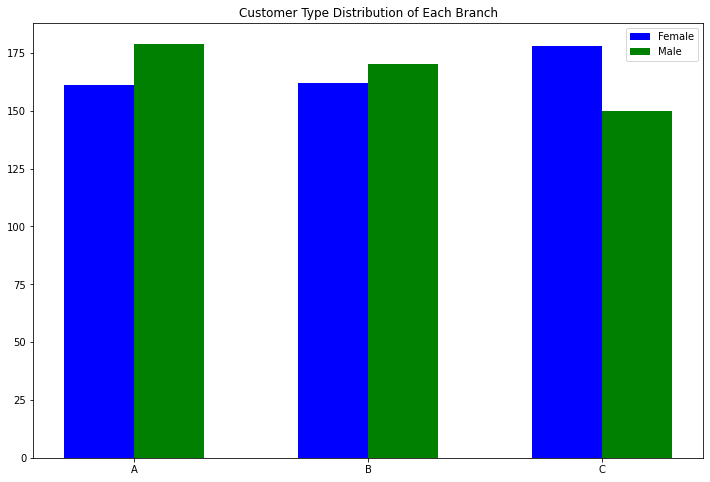

In [35]:
import matplotlib.pyplot as plt

# To Visualize This

y_value1 = sales.groupby(['Branch','Gender']).agg('size')[[0,2,4]]
y_value2 = sales.groupby(['Branch','Gender']).agg('size')[[1,3,5]]
Barwidth = 0.3
br1 = np.arange(len(y_value1))
br2 = br1 + Barwidth

plt.figure(figsize = (12,8))
plt.bar(br1,y_value1, color = 'b', width = Barwidth, label = "Female")
plt.bar(br2,y_value2, color = 'g', width = Barwidth, label = "Male")
plt.title("Customer Type Distribution of Each Branch")
plt.xticks([r + Barwidth/2 for r in range(len(y_value1))],
        ['A', 'B', 'C'])
plt.legend()
plt.show()



In [ ]:
# Then, we can see 

In [ ]:
# So I guess，Female更喜欢开membership
# If there is still time, I would use association rules mining to check it out.

In [36]:
# To explore Product Line
pd.DataFrame(sales.groupby(['Branch','Product line']).agg('size')).rename(columns={0:'counts'})

counts
Branch Product line                  
A      Electronic accessories      60
       Fashion accessories         51
       Food and beverages          58
       Health and beauty           47
       Home and lifestyle          65
       Sports and travel           59
B      Electronic accessories      55
       Fashion accessories         62
       Food and beverages          50
       Health and beauty           53
       Home and lifestyle          50
       Sports and travel           62
C      Electronic accessories      55
       Fashion accessories         65
       Food and beverages          66
       Health and beauty           52
       Home and lifestyle          45
       Sports and travel           45

In [55]:
sales.groupby(['Branch','Product line']).agg('size')[[0,2]]

Branch  Gender
A       Female    161
B       Female    162
dtype: int64

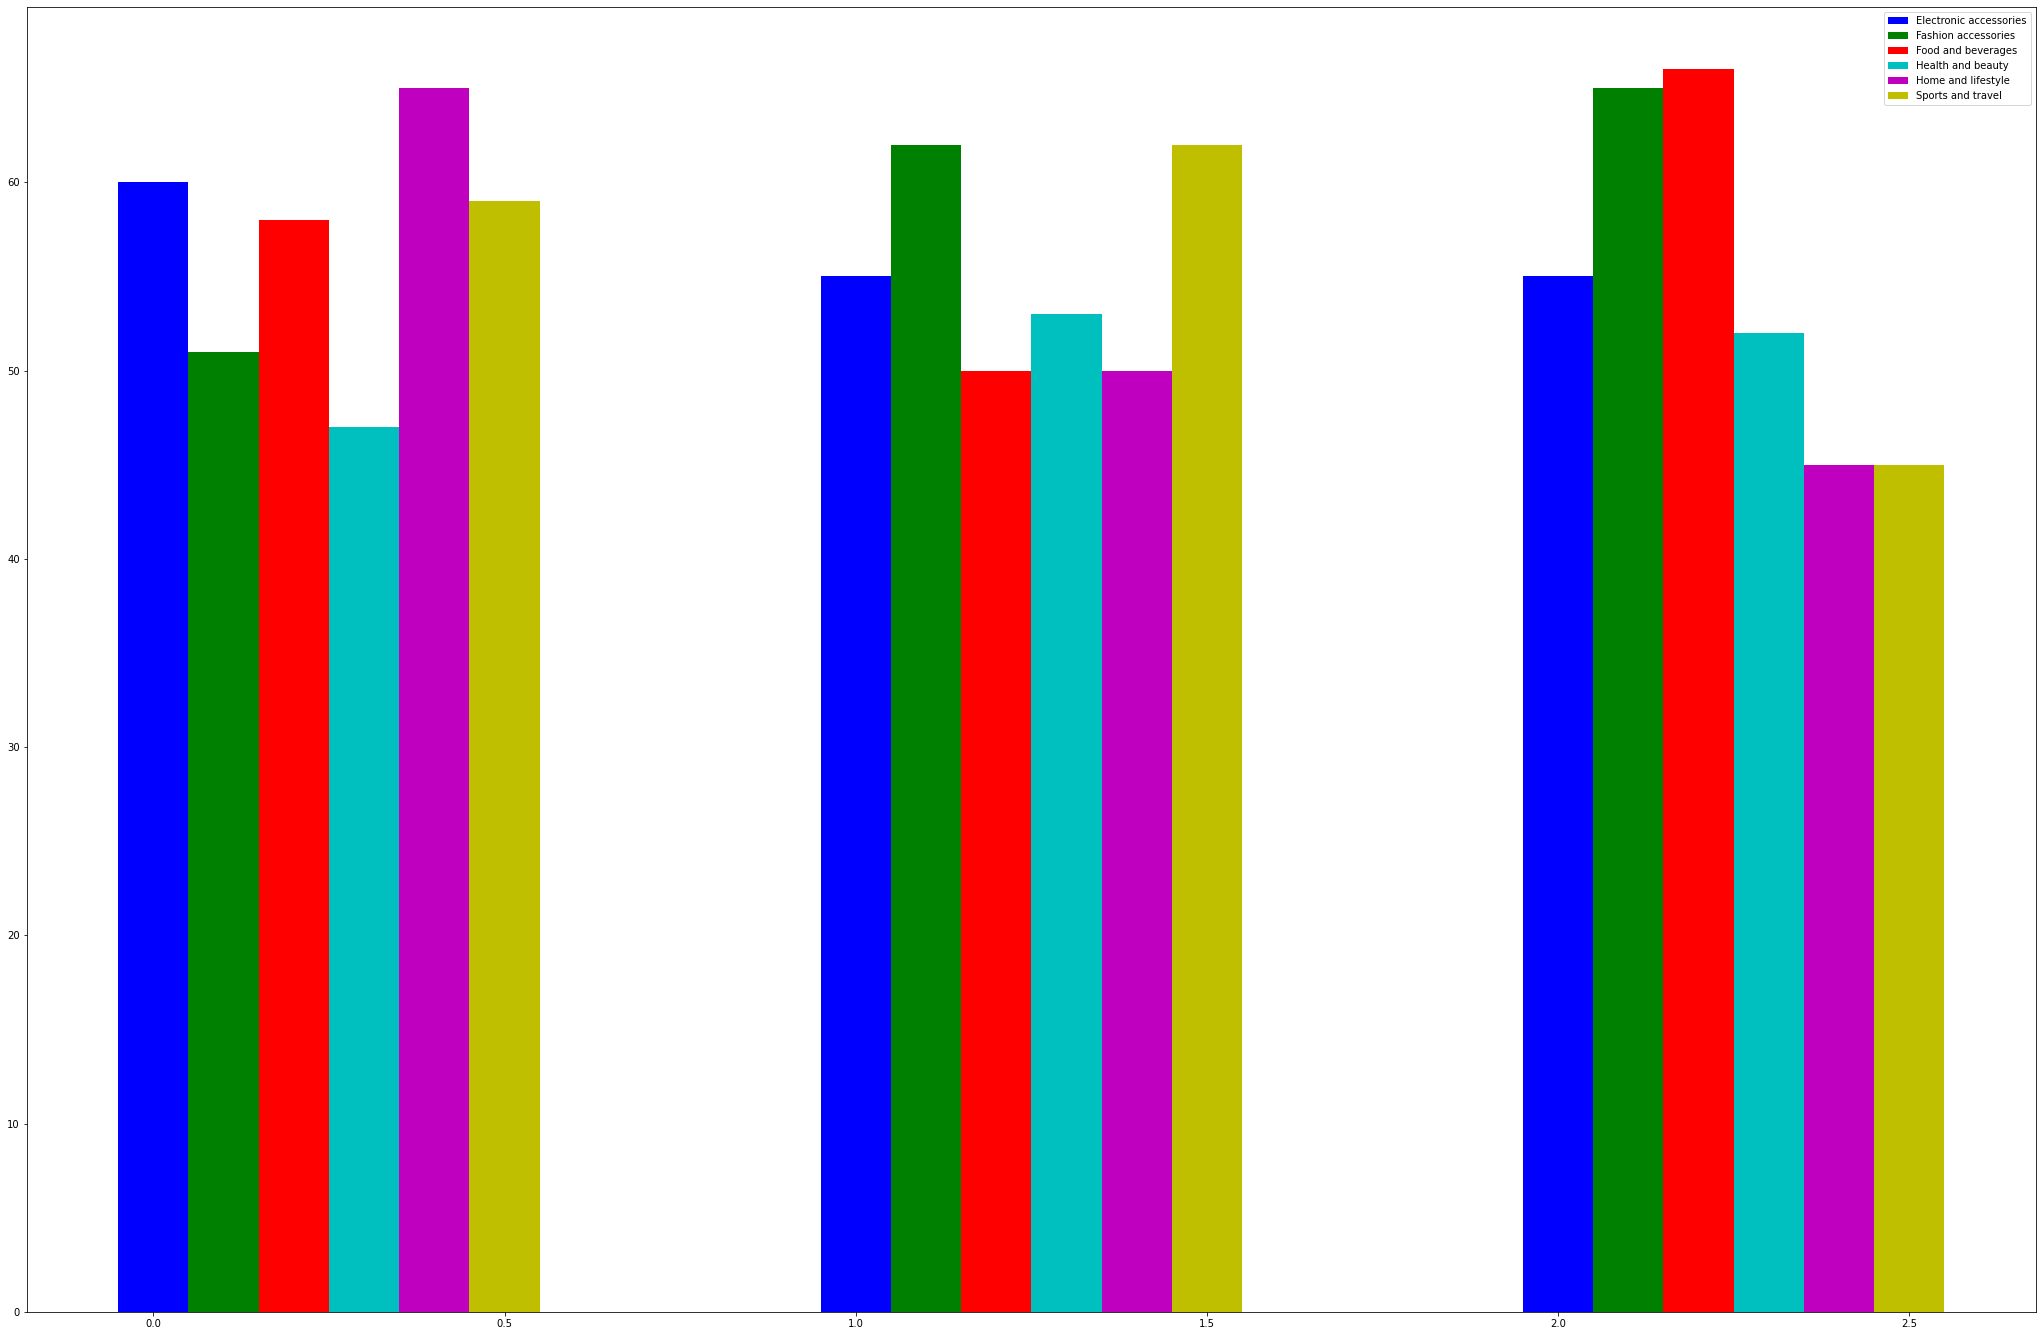

In [61]:
# To Visualize This

y_value0 = sales.groupby(['Branch','Product line']).agg('size')[[0,6,12]]
y_value1 = sales.groupby(['Branch','Product line']).agg('size')[[1,7,13]]
y_value2 = sales.groupby(['Branch','Product line']).agg('size')[[2,8,14]]
y_value3 = sales.groupby(['Branch','Product line']).agg('size')[[3,9,15]]
y_value4 = sales.groupby(['Branch','Product line']).agg('size')[[4,10,16]]
y_value5 = sales.groupby(['Branch','Product line']).agg('size')[[5,11,17]]


Barwidth = 0.1
br0 = np.arange(len(y_value0))
br1 = br0 + Barwidth
br2 = br1 + Barwidth
br3 = br2 + Barwidth
br4 = br3 + Barwidth
br5 = br4 + Barwidth

plt.figure(figsize = (36,24))

plt.bar(br0,y_value0, color = 'b', width = Barwidth, label = "Electronic accessories")
plt.bar(br1,y_value1, color = 'g', width = Barwidth, label = "Fashion accessories")
plt.bar(br2,y_value2, color = 'r', width = Barwidth, label = "Food and beverages")
plt.bar(br3,y_value3, color = 'c', width = Barwidth, label = "Health and beauty")
plt.bar(br4,y_value4, color = 'm', width = Barwidth, label = "Home and lifestyle")
plt.bar(br5,y_value5, color = 'y', width = Barwidth, label = "Sports and travel")

#plt.title("Customer Type Distribution of Each Branch")
#plt.xticks([r + Barwidth/2 for r in range(len(y_value1))],
#        ['A', 'B', 'C'])
plt.legend()
plt.show()
 


In [62]:
sales.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Quantity,Total,Time,Payment,gross income,Rating
0,750-67-8428,A,Member,Female,Health and beauty,7,548.9715,13:08,Ewallet,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,5,80.2200,10:29,Cash,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,7,340.5255,13:23,Credit card,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,8,489.0480,20:33,Ewallet,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,7,634.3785,10:37,Ewallet,30.2085,5.3


In [247]:
pd.DataFrame(sales.groupby(['Branch','Payment']).agg('size')).rename(columns={0:'counts'})

counts
Branch Payment            
A      Cash            110
       Credit card     104
       Ewallet         126
B      Cash            110
       Credit card     109
       Ewallet         113
C      Cash            124
       Credit card      98
       Ewallet         106

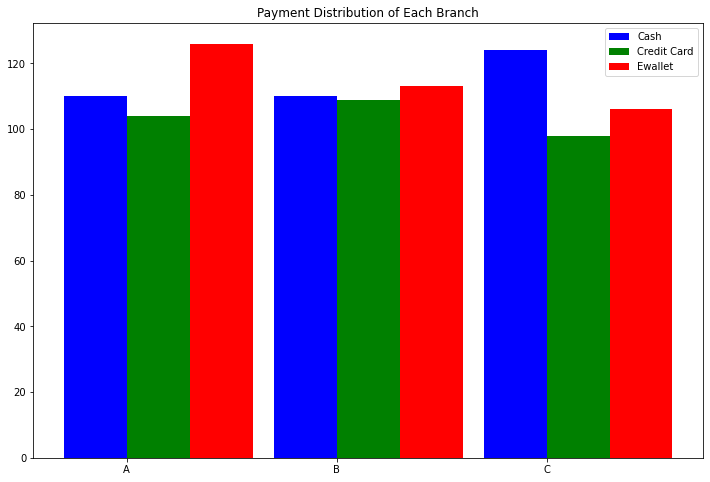

In [251]:
import matplotlib.pyplot as plt

# To Visualize This

y_value1 = sales.groupby(['Branch','Payment']).agg('size')[[0,3,6]]
y_value2 = sales.groupby(['Branch','Payment']).agg('size')[[1,4,7]]
y_value3 = sales.groupby(['Branch','Payment']).agg('size')[[2,5,8]]

Barwidth = 0.3
br1 = np.arange(len(y_value1))
br2 = br1 + Barwidth
br3 = br2 + Barwidth

plt.figure(figsize = (12,8))
plt.bar(br1,y_value1, color = 'b', width = Barwidth, label = "Cash")
plt.bar(br2,y_value2, color = 'g', width = Barwidth, label = "Credit Card")
plt.bar(br3,y_value3, color = 'r', width = Barwidth, label = "Ewallet")

plt.title("Payment Distribution of Each Branch")
plt.xticks([r + Barwidth/2 for r in range(len(y_value1))],
        ['A', 'B', 'C'])
plt.legend()
plt.show()

## Numeric Attributes
We Calculate some basic statistic value and make box plot to see its distribution.

In [65]:
# To see the product selling quantity situation about Branches
sales.groupby(["Branch"]).agg("sum")

,Quantity,Total,gross income,Rating
Branch,,,,
A,1859,106200.3705,5057.1605,2389.2
B,1820,106197.6720,5057.0320,2263.6
C,1831,110568.7065,5265.1765,2319.9


In [66]:
sales.groupby(["Branch"]).agg("mean")

,Quantity,Total,gross income,Rating
Branch,,,,
A,5.467647,312.354031,14.874001,7.027059
B,5.481928,319.872506,15.232024,6.818072
C,5.582317,337.099715,16.052367,7.072866


In [70]:
sales.groupby(["Branch"])

In [174]:
# Subset the data
sales_A = sales[sales["Branch"]== "A"]
sales_B = sales[sales["Branch"]== "B"]
sales_C = sales[sales["Branch"]== "C"]

<AxesSubplot:>

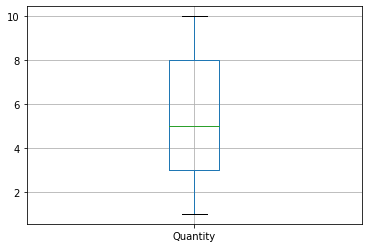

In [80]:
sales_A.boxplot("Quantity")

In [93]:
all_data_A = sales_A[["Quantity","Total", 'gross income','Rating']]

Text(0.5, 1.0, 'Rating of Branch A')

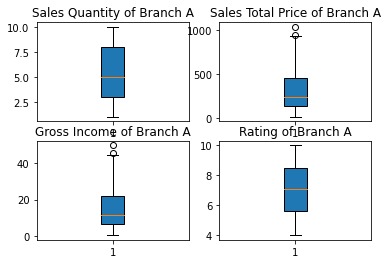

In [97]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(sales_A["Quantity"], vert=True, patch_artist=True)
axs[0, 0].set_title('Sales Quantity of Branch A')
axs[0, 1].boxplot(sales_A["Total"], vert=True, patch_artist=True)
axs[0, 1].set_title('Sales Total Price of Branch A')
axs[1, 0].boxplot(sales_A["gross income"], vert=True, patch_artist=True)
axs[1, 0].set_title('Gross Income of Branch A')
axs[1, 1].boxplot(sales_A["Rating"], vert=True, patch_artist=True)
axs[1, 1].set_title('Rating of Branch A')

In [ ]:
# Create Box Plot to see the distribution Difference

Text(0.5, 1.0, 'Quantity Distribution of Branches')

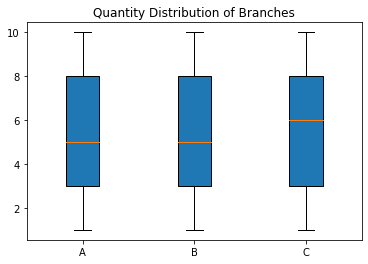

In [107]:
all_data_Quantity = [sales_A["Quantity"],sales_B["Quantity"],sales_C["Quantity"]]
labels = ['A', 'B', 'C']
plt.boxplot(all_data_Quantity, vert=True, patch_artist=True, labels=labels) 
plt.title("Quantity Distribution of Branches")

Text(0.5, 1.0, 'Total Price Distribution of Branches')

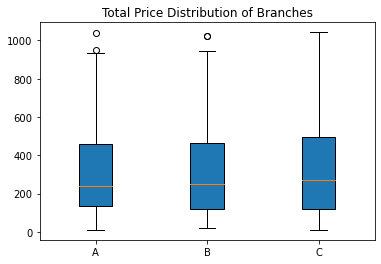

In [106]:
all_data_Total = [sales_A["Total"],sales_B["Total"],sales_C["Total"]]
labels = ['A', 'B', 'C']
plt.boxplot(all_data_Total, vert=True, patch_artist=True, labels=labels)
plt.title("Total Price Distribution of Branches")

Text(0.5, 1.0, 'Gross Income Distribution of Branches')

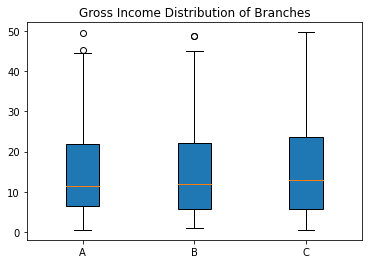

In [108]:
all_data_Gross_Income = [sales_A["gross income"],sales_B["gross income"],sales_C["gross income"]]
labels = ['A', 'B', 'C']
plt.boxplot(all_data_Gross_Income, vert=True, patch_artist=True, labels=labels)
plt.title("Gross Income Distribution of Branches")

Text(0.5, 1.0, 'Rating Distribution of Branches')

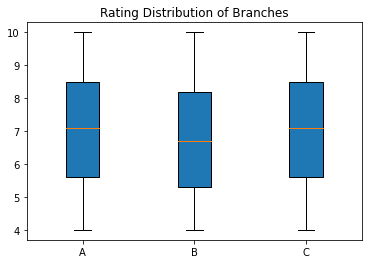

In [110]:
all_data_Rating = [sales_A["Rating"],sales_B["Rating"],sales_C["Rating"]]
labels = ['A', 'B', 'C']
plt.boxplot(all_data_Rating, vert=True, patch_artist=True, labels=labels)
plt.title("Rating Distribution of Branches")

In [148]:
# To Process the Time Data, to see when there are most customers shopping/purchasing in the super market
sales["Time"] = pd.to_datetime(sales["Time"])

In [149]:
sales["Time"]

0     2022-02-17 13:08:00
1     2022-02-17 10:29:00
2     2022-02-17 13:23:00
3     2022-02-17 20:33:00
4     2022-02-17 10:37:00
              ...        
995   2022-02-17 13:46:00
996   2022-02-17 17:16:00
997   2022-02-17 13:22:00
998   2022-02-17 15:33:00
999   2022-02-17 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [150]:
sales.groupby("Branch")

In [192]:
sales["Time"].head()

0    13:08
1    10:29
2    13:23
3    20:33
4    10:37
Name: Time, dtype: object

In [180]:
from pandas import Series

Text(0.5, 1.0, 'Purchasing Amount During a Day in Branch A')

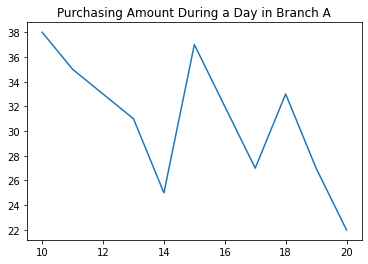

In [243]:
Count_10 = sum(sales_A["Time"].str.startswith("10"))
Count_11 = sum(sales_A["Time"].str.startswith("11"))
Count_12 = sum(sales_A["Time"].str.startswith("12"))
Count_13 = sum(sales_A["Time"].str.startswith("13"))
Count_14 = sum(sales_A["Time"].str.startswith("14"))
Count_15 = sum(sales_A["Time"].str.startswith("15"))
Count_16 = sum(sales_A["Time"].str.startswith("16"))
Count_17 = sum(sales_A["Time"].str.startswith("17"))
Count_18 = sum(sales_A["Time"].str.startswith("18"))
Count_19 = sum(sales_A["Time"].str.startswith("19"))
Count_20 = sum(sales_A["Time"].str.startswith("20"))

# Make the line graph
A_time_purchase = np.array([Count_10,Count_11,Count_12,Count_13,Count_14,Count_15,
                            Count_16,Count_17,Count_18,Count_19,Count_20])
x = np.arange(10,21)
plt.plot(x,A_time_purchase)
plt.title("Purchasing Amount During a Day in Branch A")

Text(0.5, 1.0, 'Purchasing Amount During a Day in Branch B')

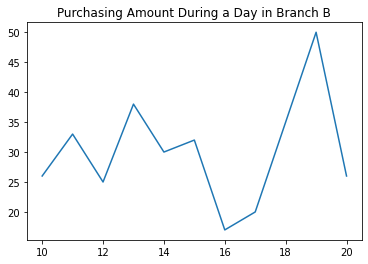

In [244]:
Count_10 = sum(sales_B["Time"].str.startswith("10"))
Count_11 = sum(sales_B["Time"].str.startswith("11"))
Count_12 = sum(sales_B["Time"].str.startswith("12"))
Count_13 = sum(sales_B["Time"].str.startswith("13"))
Count_14 = sum(sales_B["Time"].str.startswith("14"))
Count_15 = sum(sales_B["Time"].str.startswith("15"))
Count_16 = sum(sales_B["Time"].str.startswith("16"))
Count_17 = sum(sales_B["Time"].str.startswith("17"))
Count_18 = sum(sales_B["Time"].str.startswith("18"))
Count_19 = sum(sales_B["Time"].str.startswith("19"))
Count_20 = sum(sales_B["Time"].str.startswith("20"))
B_time_purchase = np.array([Count_10,Count_11,Count_12,Count_13,Count_14,Count_15,
                            Count_16,Count_17,Count_18,Count_19,Count_20])
x = np.arange(10,21)
plt.plot(x, B_time_purchase)
plt.title("Purchasing Amount During a Day in Branch B")

Text(0.5, 1.0, 'Purchasing Amount During a Day in Branch C')

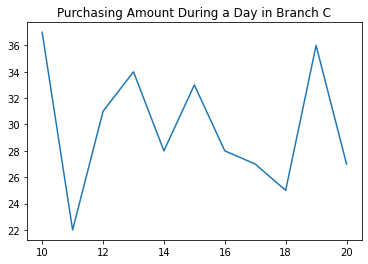

In [245]:
Count_10 = sum(sales_C["Time"].str.startswith("10"))
Count_11 = sum(sales_C["Time"].str.startswith("11"))
Count_12 = sum(sales_C["Time"].str.startswith("12"))
Count_13 = sum(sales_C["Time"].str.startswith("13"))
Count_14 = sum(sales_C["Time"].str.startswith("14"))
Count_15 = sum(sales_C["Time"].str.startswith("15"))
Count_16 = sum(sales_C["Time"].str.startswith("16"))
Count_17 = sum(sales_C["Time"].str.startswith("17"))
Count_18 = sum(sales_C["Time"].str.startswith("18"))
Count_19 = sum(sales_C["Time"].str.startswith("19"))
Count_20 = sum(sales_C["Time"].str.startswith("20"))

C_time_purchase = np.array([Count_10,Count_11,Count_12,Count_13,Count_14,Count_15,
                            Count_16,Count_17,Count_18,Count_19,Count_20])
x = np.arange(10,21)
plt.plot(x, C_time_purchase)
plt.title("Purchasing Amount During a Day in Branch C")

<Figure size 864x720 with 0 Axes>

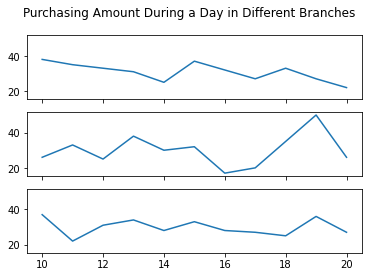

In [262]:
plt.figure(figsize = (12,10))
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Purchasing Amount During a Day in Different Branches')
ax1.plot(x, A_time_purchase)
# ax1.set_title('Purchasing Amount During a Day in Branch A')
ax2.plot(x, B_time_purchase)
# ax2.set_title('Purchasing Amount During a Day in Branch B')
ax3.plot(x, C_time_purchase)
# ax3.set_title('Purchasing Amount During a Day in Branch C')

In [252]:
sales.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Quantity,Total,Time,Payment,gross income,Rating
0,750-67-8428,A,Member,Female,Health and beauty,7,548.9715,13:08,Ewallet,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,5,80.2200,10:29,Cash,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,7,340.5255,13:23,Credit card,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,8,489.0480,20:33,Ewallet,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,7,634.3785,10:37,Ewallet,30.2085,5.3
